# **Deep Research with Bing Search**

This notebook demonstrates an agentic research workflow that leverages Azure AI services to conduct comprehensive web-based research on any topic. The workflow includes:

1. **Research Planning** - Breaking down complex queries into structured subtopics and targeted search queries
2. **Information Retrieval** - Using Bing Search API through Azure AI Services to gather relevant web content
3. **Content Analysis** - Summarizing search results and extracting key insights 
4. **Report Generation** - Creating detailed research reports with proper citations
5. **Peer Review** - Evaluating report quality and suggesting improvements until quality standards are met

The notebook orchestrates multiple specialized AI agents working together:
- PlannerAgent - Creates comprehensive research plans with subtopics and queries
- BingSearchAgent - Retrieves relevant search results from the web
- SummaryAgent - Extracts key insights from retrieved content
- ResearchAgent - Compiles findings into structured research reports
- PeerReviewAgent - Provides quality feedback in a continuous improvement loop

Built with Azure OpenAI, Azure AI Projects, and the OpenAI Agents SDK.

## Environment Setup

First, we'll set up our environment by importing necessary libraries and loading environment variables from a .env file. These environment variables contain configuration details such as API keys and endpoints for the Azure OpenAI and Bing Search services.

In [1]:
import dotenv
dotenv.load_dotenv(".env", override=True)

True

## Agent Configuration

The research workflow is powered by Azure AI Agents, with Semantic Kernel serving as the orchestration framework to coordinate between different specialized agents.

All agents are created using Azure AI Projects and are orchestrated through Semantic Kernel to handle various research tasks including web search capabilities and specialized analysis.

Let's configure each agent with their specific instructions and capabilities using the Semantic Kernel framework.

### Azure AI Foundry Connections

First, we'll establish connections to Azure AI Projects, which provides the infrastructure for our Bing Search agent.

In [2]:
from azure.ai.projects import AIProjectClient
from azure.identity import DefaultAzureCredential
import os

project_client = AIProjectClient(
    credential=DefaultAzureCredential(),
    endpoint=os.getenv("PROJECT_ENDPOINT")
)

The following cell will **create the Azure AI Agents**, so you only need to run this cell **once**.

In [3]:
# from common.create_azure_ai_agents import (
#     create_bing_search_agent,
#     create_research_plan_agent,
#     create_summary_agent,
#     create_research_report_agent,
#     create_peer_review_agent
# )

# planner_agent = create_research_plan_agent(project_client=project_client)
# bing_search_agent = create_bing_search_agent(project_client=project_client)
# summary_agent = create_summary_agent(project_client=project_client)
# research_agent = create_research_report_agent(project_client=project_client)
# peer_review_agent = create_peer_review_agent(project_client=project_client)

Fetch agents from Ai Foundry

In [4]:
planner_agent = project_client.agents.get_agent(agent_id=os.getenv("PlannerAgentID"))
bing_search_agent = project_client.agents.get_agent(agent_id=os.getenv("BingSearchAgentID"))
summary_agent = project_client.agents.get_agent(agent_id=os.getenv("SummaryAgentID"))
research_agent = project_client.agents.get_agent(agent_id=os.getenv("ResearchAgentID"))
peer_review_agent = project_client.agents.get_agent(agent_id=os.getenv("PeerReviewAgentID"))

Update their system messages

In [5]:
from common.update_instructions import (
    update_planner_instructions,
    update_bing_instructions,
    update_summary_instructions,
    update_research_instructions,
    update_peer_review_instructions
)

planner_agent = update_planner_instructions(agent=planner_agent)
bing_search_agent = update_bing_instructions(agent=bing_search_agent)
summary_agent = update_summary_instructions(agent=summary_agent)
research_agent = update_research_instructions(agent=research_agent)
peer_review_agent = update_peer_review_instructions(agent=peer_review_agent)

Initialize the Azure AI Agents with Semantic Kernel

In [6]:
# from semantic_kernel.agents import AzureAIAgent, AzureAIAgentThread

# # NOT THE SAME PROJECT CLIENT AS THE ONE USED TO CREATE AGENTS
# project_client_sk = AzureAIAgent.create_client(
#         credential=DefaultAzureCredential(),
#         endpoint=os.getenv("PROJECT_ENDPOINT")
#     )

# planner_agent = AzureAIAgent(client=project_client_sk, definition=planner_agent)
# bing_search_agent = AzureAIAgent(client=project_client_sk, definition=bing_search_agent)
# summary_agent = AzureAIAgent(client=project_client_sk, definition=summary_agent)
# research_agent = AzureAIAgent(client=project_client_sk, definition=research_agent)
# peer_review_agent = AzureAIAgent(client=project_client_sk, definition=peer_review_agent)

**Create Handoffs**

In [7]:
# from semantic_kernel.agents import OrchestrationHandoffs

# handoffs = (
#     OrchestrationHandoffs()
#     .add(
#         source_agent=research_agent.name,
#         target_agent=peer_review_agent.name,
#         description="Transfer to this agent when you've written the research report and need peer review"
#     )
#     .add(
#         source_agent=peer_review_agent.name,
#         target_agent=research_agent.name,
#         description=(
#             "Transfer to this agent if the report you've reviewed, doesn't meet the success criteria and needs revision."
#         )
#     )
# )

## Research Workflow

Our system uses specialized AI agents to transform a user query into a comprehensive research report through these steps:

### Process Flow

1. **User Query** → User submits research topic or question
2. **Planning** → PlannerAgent develops structured research plan with objectives and subtopics
3. **Information Retrieval** → BingSearchAgent executes targeted web searches for each area
4. **Analysis** → SummaryAgent processes results, extracting key insights while preserving technical details
5. **Synthesis** → ResearchAgent creates well-structured report with proper citations
6. **Quality Control** → PeerReviewAgent evaluates report for completeness, clarity, and evidence
7. **Revision** → If needed, research report undergoes improvement cycles based on feedback
8. **Delivery** → Final comprehensive, high-quality report delivered to user

This collaborative approach combines the strengths of different specialized agents to produce thorough, evidence-based research that meets predefined quality standards.

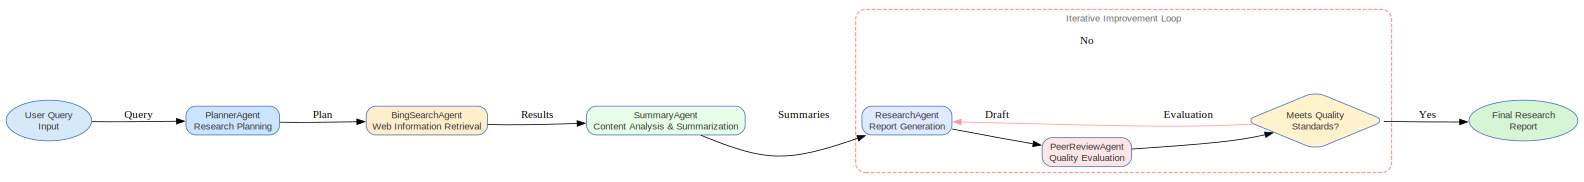

In [8]:
from common.helper import create_research_workflow_diagram

# This will generate research_workflow_diagram.png and return the Digraph object
workflow_diagram = create_research_workflow_diagram()
workflow_diagram

Let's start with a sample research query.

In [9]:
# user_query="What big industries will AI have the most affected on?"
user_query="What are the differences between classical machine learning, deep learning and generative AI?"

### Step 1: Research Planning

The PlannerAgent analyzes the research query and creates a structured plan with:

- Research objective - A clear statement of what the research aims to accomplish
- Subtopics - Key areas to explore for comprehensive coverage
- Search queries - Specific queries for each subtopic to gather relevant information
- Success criteria - Metrics to determine research completeness
- Related topics - Additional areas that may provide valuable context

In [ ]:
from azure.ai.agents.models import MessageRole
from common.data_models import ResearchPlan
from common.utils_ai_agents import (
    add_user_message_to_thread,
    invoke_agent
)
import json

# create a thread and add the user message
thread = project_client.agents.threads.create()
add_user_message_to_thread(project_client, thread.id, user_query)

# invoke the planner agent to create a research plan
planner_agent_output, thread = invoke_agent(
    project_client=project_client,
    thread=thread,
    agent=planner_agent
)

# parse the output to a ResearchPlan object
plan_data = json.loads(planner_agent_output)
plan = ResearchPlan(**plan_data)

# delete the thread
project_client.agents.threads.delete(thread_id=thread.id)

message from agent ResearchPlanAgent generated

thread: thread_5b2S0uVuvZDwD8AKu6sYW67w deleted


In [12]:
plan.research_tasks[0].search_queries

['definition of classical machine learning',
 'what is deep learning in AI',
 'generative AI definition and explanation',
 'core principles of classical machine learning vs deep learning',
 'how does generative AI differ from traditional AI']

### Step 2: Information Retrieval

The BingSearchAgent executes web searches for each query in our research plan. For each subtopic:

1. We send multiple search queries to gather diverse perspectives
2. The agent returns structured search results with titles, full_text, and URLs
3. Results are organized by subtopic for further processing

This step leverages Azure AI Projects with Bing Search integration to ensure up-to-date information from across the web.

In [ ]:
from tqdm import tqdm
from common.utils_search import extract_agent_response_and_urls

search_results = []

for subtopic in tqdm(plan.research_tasks[:1], desc="Subtopics"):
    subtopic_results = {"subtopic": subtopic.subtopic, "queries": []}

    for query in tqdm(subtopic.search_queries, desc=f"Queries ({subtopic.subtopic})", leave=False):
        formatted_query = f"""
        Research the following query: {query}
        This is related to subtopic: {subtopic.subtopic}
        Please provide the information and cite your sources using the available tools.
        """
        try:
            thread = project_client.agents.threads.create()
            add_user_message_to_thread(project_client, thread.id, formatted_query)

            bing_search_agent_output, thread = invoke_agent(
                project_client=project_client,
                thread=thread,
                agent=bing_search_agent
            )

            agent_response_text, extracted_urls = extract_agent_response_and_urls(project_client, thread.id, query)

            # Add to our results collection
            subtopic_results["queries"].append({
                "query": query,
                "agent_response": agent_response_text,
                "results": extracted_urls
            })

            # Delete the thread after processing
            project_client.agents.threads.delete(thread_id=thread.id)

        except Exception as e:
            print(f"An error occurred processing query '{query}': {e}")
            # Optionally add error information to results
            subtopic_results["queries"].append({
                "query": query,
                "results": [],
                "error": str(e)
            })

    search_results.append(subtopic_results)

Subtopics:   0%|          | 0/1 [00:00<?, ?it/s]

message from agent BingSearchAgent generated



message from agent BingSearchAgent generated



message from agent BingSearchAgent generated



message from agent BingSearchAgent generated



message from agent BingSearchAgent generated



Subtopics: 100%|██████████| 1/1 [00:42<00:00, 42.40s/it]██| 5/5 [00:42<00:00,  9.07s/it]


In [14]:
print(f"Planned total search queries: {sum(1 for task in plan.research_tasks for search_query in task.search_queries)}\n")
print(f"Actually total search queries: {sum(1 for task in search_results for result in task['queries'])}\n")

Planned total search queries: 25

Actually total search queries: 5



### Step 3: Content Analysis and Summarization

For each search result retrieved, the SummaryAgent:

1. Extracts key facts, statistics, and insights from the raw search content
2. Preserves important technical details, dates, and domain-specific terminology
3. Formats the summary with key insights and detailed paragraph explanations
4. Tracks citations for proper attribution in the final report

This step transforms raw search data into structured, information-rich summaries that will form the basis of our research report.

In [15]:
from common.utils_summary import collect_responses_and_citations

mapped_chunks = []

for subtopic_result in tqdm(search_results, desc="Summarizing subtopics"):
    all_agent_responses_for_subtopic, unique_citations_for_subtopic = collect_responses_and_citations(subtopic_result)

    # --- Summarize the combined agent responses ONCE per subtopic ---
    content_to_summarize = "\n\n---\n\n".join(all_agent_responses_for_subtopic)

    subtopic_summary = "No content found to summarize for this subtopic." # Default value
    if content_to_summarize:
        summary_prompt = f"Summarize the following information related to the subtopic '{subtopic_result.get('subtopic', 'Unknown Subtopic')}':\n\n{content_to_summarize}"
        try:
            thread = project_client.agents.threads.create()
            add_user_message_to_thread(project_client, thread.id, summary_prompt)
            # Invoke the summary agent to summarize the content
            summary_agent_output, thread = invoke_agent(
                project_client=project_client,
                thread=thread,
                agent=summary_agent
            )

            # run = project_client.agents.runs.create_and_process(thread_id=thread.id, agent_id=summary_agent.id)
            # subtopic_summary = get_last_message_by_role(project_client, thread.id, MessageRole.AGENT)
            subtopic_summary = summary_agent_output.strip()  # Ensure we get the text output
        except Exception as e:
            print(f"Error summarizing subtopic '{subtopic_result.get('subtopic', 'Unknown Subtopic')}': {e}")
            subtopic_summary = f"Error during summarization for subtopic '{subtopic_result.get('subtopic', 'Unknown Subtopic')}'. Details: {e}"
            # Depending on requirements, you might want to raise the exception, log it, or handle it differently

    # --- Convert set of tuples back to list of dictionaries (or Citation objects) ---
    citations_list = [
        {"title": title, "url": url}
        for title, url in unique_citations_for_subtopic
    ]

    # --- Append the consolidated result ---
    mapped_chunks.append({
        "subtopic": subtopic_result.get("subtopic", "Unknown Subtopic"), # Use .get for safety
        "summary": subtopic_summary,
        "citations": citations_list
    })

Summarizing subtopics: 100%|██████████| 1/1 [00:19<00:00, 19.70s/it]

message from agent SummaryAgent generated



### Step 4: Report Generation and Peer Review

In this final stage:

1. The ResearchAgent synthesizes all summarized content into a comprehensive report
2. The PeerReviewAgent evaluates the report based on completeness, clarity, evidence, and insight
3. If needed, the report is revised based on feedback
4. This cycle continues until quality standards are met

The final report is structured as a cohesive academic-style document with proper citations and a references section.

In [ ]:
from common.data_models import ComprehensiveResearchReport, PeerReviewFeedback
from common.utils_ai_agents import add_user_message_to_thread

def loop_agents(project_client, agent_a, agent_b, initial_input, max_iterations=10):
    """
    Loop between two agents until agent B produces the target output.
    
    Args:
        agent_a: Function that takes input and returns output
        agent_b: Function that takes input and returns output
        initial_input: Starting input for agent A
        max_iterations: Safety limit to prevent infinite loops
    
    Returns:
        The final output from agent B, or None if max iterations reached
    """

    thread = project_client.agents.threads.create()
    add_user_message_to_thread(project_client, thread.id, initial_input)

    for it in range(max_iterations):        
        # Agent A processes the input
        a_output, thread = invoke_agent(
            project_client=project_client,
            thread=thread,
            agent=agent_a
        )
        
        # Agent B processes A's output
        b_output, thread = invoke_agent(
            project_client=project_client,
            thread=thread,
            agent=agent_b
        )

        b_output_json = json.loads(b_output)
        review = PeerReviewFeedback(**b_output_json)

        # Check if B produced the target output
        if review.is_satisfactory is not False:
            print(f"Target output reached after {it+1} iterations!")
            report_json = json.loads(a_output)
            final_report = ComprehensiveResearchReport(**report_json)

            # delete the thread
            project_client.agents.threads.delete(thread_id=thread.id)
            return final_report
        
        # Use B's output as input for the next iteration
        current_input = b_output

    print(f"Max iterations ({max_iterations}) reached without finding target output") 
    return None

In [17]:
import json
from common.utils_research import preprocess_research_data

research_input = preprocess_research_data(plan, mapped_chunks)
research_input_prompt = json.dumps(research_input, indent=2)

research_query = (
    "Create an exceptionally comprehensive, **paragraph-focused** and detailed research report "
    "using the following content. **Minimize bullet points** and ensure the final text resembles "
    "a cohesive, academic-style paper:\n\n"
    f"{research_input_prompt}\n\n"
    "As a final reminder, don't forget to include the citation list at the end of the report."
)

# Run the loop
final_report = loop_agents(
    project_client=project_client,
    agent_a=research_agent,
    agent_b=peer_review_agent,
    initial_input=research_query,
    max_iterations=10
)

Iteration: 1
message from agent ResearchReportAgent generated

message from agent PeerReviewAgent generated

Target output reached after 1 iterations!
thread: thread_akup12RtYsMFGnGnu7RnHfaq deleted


In [21]:
from IPython.display import display, Markdown
display(Markdown(final_report.research_report))

# Defining and Differentiating Classical Machine Learning, Deep Learning, and Generative AI: Principles, Methodologies, Applications, Strengths, and Limitations

## Introduction

Artificial intelligence (AI) has undergone a remarkable evolution over the past several decades, transitioning from rule-based systems to sophisticated paradigms capable of not only analyzing but also generating content. This progression is marked by three major conceptual and technological milestones: classical machine learning, deep learning, and generative AI. Each paradigm is characterized by distinct core principles, methodologies, and application domains, as well as unique strengths and limitations. Understanding these differences is crucial for practitioners, researchers, and decision-makers seeking to harness the power of AI in diverse contexts. This report provides an in-depth, comparative analysis of these three approaches, exploring their definitions, underlying methodologies, real-world applications, and the broader implications of their adoption. The narrative also traces the historical development of these paradigms, elucidating the relationships and transitions that have shaped the current landscape of AI.

## Definitions and Core Principles

### Classical Machine Learning

Classical machine learning refers to a suite of algorithms rooted in statistical and mathematical modeling, designed to identify patterns and relationships within data. These algorithms, such as linear regression, logistic regression, decision trees, support vector machines (SVMs), and k-nearest neighbors (KNN), are most effective when applied to well-structured, tabular datasets where the problem space is clearly defined. The hallmark of classical machine learning is its reliance on manual feature engineering, where human experts extract and select relevant features from raw data to optimize model performance. This approach emphasizes interpretability, allowing practitioners to understand the influence of individual features on model predictions—a critical attribute in domains requiring transparency and regulatory compliance. Classical machine learning models are typically computationally efficient and require relatively modest amounts of data, making them accessible for a wide range of business intelligence and analytical tasks [3].

### Deep Learning

Deep learning represents a significant advancement within the broader field of machine learning, distinguished by its use of artificial neural networks composed of multiple hidden layers—hence the term "deep." These architectures are inspired by the structure and function of the human brain, enabling the automatic extraction of hierarchical, high-level features from raw, often unstructured data such as images, audio, and text. Deep learning models, including convolutional neural networks (CNNs) for image processing and recurrent neural networks (RNNs) for sequential data, excel at capturing complex, non-linear relationships that are difficult or impossible to model using classical techniques. The end-to-end learning capability of deep learning systems reduces the need for manual feature engineering, streamlining the development process and enabling breakthroughs in fields like computer vision and natural language processing (NLP). However, this increased complexity comes at the cost of reduced interpretability, as deep neural networks often function as "black boxes" whose internal decision-making processes are opaque to users [1].

### Generative AI

Generative AI constitutes the latest paradigm in artificial intelligence, building upon the foundations of deep learning to create new, original content—ranging from text and images to music and code. Unlike classical and deep learning models, which are primarily designed for classification or prediction, generative AI models are capable of synthesizing outputs that are statistically similar to their training data but are not mere replicas. This is achieved through advanced architectures such as generative adversarial networks (GANs) and large language models (LLMs) like GPT, which leverage vast datasets and sophisticated training regimes to internalize complex statistical relationships. Generative AI is distinguished by its creative potential, enabling automation and augmentation of tasks traditionally reserved for human creativity, such as art, design, content creation, and scientific hypothesis generation [1][2][5].

### Traditional (Narrow) AI

For completeness, it is important to distinguish traditional or "narrow" AI from the aforementioned paradigms. Traditional AI systems are characterized by their deterministic, rule-based approaches, tailored to specific, narrowly defined tasks such as playing chess or spam filtering. These systems rely on explicit rules and logic, lacking the capacity for generative or creative output. While invaluable for certain applications, traditional AI is fundamentally different from the data-driven, adaptive models that define modern machine learning and generative AI [6].

### Comparative Overview of Core Principles

The following table synthesizes the core principles of each paradigm, highlighting their distinguishing features:

| Aspect              | Classical ML                               | Deep Learning                                     | Generative AI                                      | Traditional AI               |
|---------------------|--------------------------------------------|---------------------------------------------------|----------------------------------------------------|------------------------------|
| Feature Engineering | Manual, essential                          | Automatic, hierarchical                           | Automatic, creative pattern synthesis              | Manual or rules-based        |
| Data Requirements   | Smaller, structured                        | Large, often unstructured                         | Vast, diverse, unstructured                        | Typically structured         |
| Model Complexity    | Lower, often interpretable                  | High, complex, less interpretable                 | Very high, creative, less interpretable            | Low, deterministic           |
| Computation         | Less intensive                             | More intensive (heavy use of GPUs/TPUs)           | Highly intensive                                  | Low to moderate              |
| Output              | Predictive, analytical                     | Predictive, analytical/recognitive                | Generative, creative                               | Analytical, non-generative   |
| Use Cases           | Business analytics, diagnosis, risk scoring| Image recognition, NLP, speech, recommendation    | Text/image/audio synthesis, creative applications   | Chess, spam filtering, etc.  |

This comparative overview underscores the progression from manual, structured approaches in classical machine learning to the automated, scalable, and creative capabilities of generative AI.

## Methodologies and Algorithms

### Classical Machine Learning Methodologies

Classical machine learning methodologies are grounded in well-established statistical techniques and mathematical models. The process typically begins with data preprocessing, followed by manual feature engineering, where domain experts identify and extract relevant features from the raw data. Feature selection is a critical step, as the quality and relevance of features directly influence model performance. Once features are defined, various algorithms can be applied, each with its own assumptions and strengths. For example, linear regression is suitable for modeling linear relationships between variables, while logistic regression is used for binary classification tasks. Decision trees provide a hierarchical approach to decision-making, offering interpretability and the ability to handle both categorical and numerical data. Support vector machines (SVMs) are effective for high-dimensional spaces and can model non-linear relationships through kernel functions. K-nearest neighbors (KNN) is a non-parametric method that classifies data points based on their proximity to labeled examples in the feature space. Model evaluation in classical machine learning often relies on metrics such as accuracy, precision, recall, and F1-score, with cross-validation used to assess generalizability [3].

### Deep Learning Methodologies

Deep learning methodologies diverge significantly from classical approaches, primarily through their use of artificial neural networks with multiple hidden layers. The architecture of a deep neural network is composed of interconnected nodes (neurons) organized into input, hidden, and output layers. Each layer transforms the data through learned weights and activation functions, enabling the network to capture increasingly abstract representations. Convolutional neural networks (CNNs) are specialized for processing grid-like data, such as images, by applying convolutional filters that detect spatial hierarchies of features. Recurrent neural networks (RNNs), and their variants like long short-term memory (LSTM) networks, are designed for sequential data, capturing temporal dependencies in tasks such as language modeling and speech recognition. Training deep learning models requires large datasets and significant computational resources, often leveraging graphics processing units (GPUs) or tensor processing units (TPUs) to accelerate matrix operations. Optimization is typically performed using stochastic gradient descent (SGD) or its variants, with backpropagation employed to update weights based on the error gradient. Regularization techniques, such as dropout and batch normalization, are used to prevent overfitting and improve generalization [1].

### Generative AI Methodologies

Generative AI methodologies build upon deep learning architectures to enable the creation of new, original content. Two of the most prominent approaches are generative adversarial networks (GANs) and large language models (LLMs). GANs consist of two neural networks—a generator and a discriminator—that are trained simultaneously in a competitive framework. The generator creates synthetic data samples, while the discriminator evaluates their authenticity relative to real data. Through this adversarial process, the generator learns to produce increasingly realistic outputs. GANs have been instrumental in advancing image synthesis, style transfer, and data augmentation. Large language models, such as GPT, employ transformer architectures trained on massive text corpora to predict and generate coherent, contextually relevant text. These models utilize self-attention mechanisms to capture long-range dependencies and semantic relationships within the data. The training process for generative AI models is resource-intensive, often requiring distributed computing and access to vast datasets. Evaluation metrics for generative models include measures of diversity, coherence, and fidelity to the training distribution, as well as human evaluation for subjective quality [1][2][5].

### Traditional AI Methodologies

Traditional AI methodologies are characterized by rule-based systems and symbolic reasoning. Expert systems, for example, encode domain knowledge in the form of if-then rules, enabling the automation of decision-making in narrowly defined tasks. These systems are deterministic and lack the capacity for learning from data, limiting their adaptability and scalability. While effective for specific applications, traditional AI is increasingly being supplanted by data-driven approaches that offer greater flexibility and performance [6].

## Applications and Use Cases

### Classical Machine Learning Applications

Classical machine learning remains foundational in a wide array of industries and applications, particularly where data is structured and interpretability is paramount. In finance, classical models are used for credit scoring, fraud detection, and risk assessment, leveraging historical transaction data to identify patterns indicative of creditworthiness or anomalous behavior. In healthcare, logistic regression and decision trees support diagnostic decision-making by modeling relationships between patient attributes and outcomes. Marketing and customer analytics benefit from clustering algorithms and classification models to segment customers, predict churn, and optimize targeting strategies. Manufacturing and supply chain management utilize predictive maintenance models to anticipate equipment failures and optimize inventory levels. The transparency and efficiency of classical machine learning make it well-suited for regulatory environments and scenarios where explainability is a legal or ethical requirement [3].

### Deep Learning Applications

Deep learning has revolutionized fields characterized by large volumes of unstructured data and complex pattern recognition tasks. In computer vision, CNNs power image classification, object detection, facial recognition, and medical imaging diagnostics, achieving performance levels that rival or surpass human experts. Natural language processing (NLP) applications, such as machine translation, sentiment analysis, and question answering, are driven by deep learning models capable of understanding and generating human language. Speech recognition and synthesis systems, enabled by RNNs and transformer models, have transformed human-computer interaction, facilitating voice assistants and automated transcription services. Recommender systems in e-commerce and entertainment platforms leverage deep learning to personalize content and product suggestions based on user behavior and preferences. Autonomous vehicles rely on deep neural networks for perception, decision-making, and control, integrating data from cameras, lidar, and radar sensors to navigate complex environments [1].

### Generative AI Applications

Generative AI is at the forefront of a new wave of applications that extend beyond analysis and recognition to content creation and augmentation. In the creative industries, generative models are used to produce original artwork, music, and literature, blurring the line between human and machine creativity. Text-to-image synthesis, powered by GANs and diffusion models, enables the generation of realistic images from textual descriptions, opening new possibilities in design, advertising, and entertainment. Large language models are employed for automated content generation, including news articles, marketing copy, and code, as well as for conversational agents and chatbots that engage users in natural dialogue. In scientific research, generative AI assists in hypothesis generation, drug discovery, and the design of novel materials by exploring vast combinatorial spaces. Data augmentation and synthetic data generation support machine learning workflows by providing additional training examples, improving model robustness and generalization [1][2][5].

### Traditional AI Applications

Traditional AI continues to play a role in domains where tasks are well-defined and rule-based logic suffices. Classic examples include chess-playing programs, expert systems for medical diagnosis, and rule-based spam filters. These systems are valued for their predictability and reliability in constrained environments but lack the adaptability and creative potential of modern machine learning and generative AI approaches [6].

### Industry Impact Assessment

The following matrix summarizes the impact of each paradigm across key industries:

| Industry         | Classical ML | Deep Learning | Generative AI | Traditional AI |
|------------------|--------------|---------------|---------------|---------------|
| Finance          | High         | Moderate      | Emerging      | Moderate      |
| Healthcare       | High         | High          | Emerging      | Moderate      |
| Manufacturing    | High         | Moderate      | Low           | Moderate      |
| Creative Arts    | Low          | Moderate      | High          | Low           |
| Retail/E-Commerce| High         | High          | Moderate      | Moderate      |
| Transportation   | Moderate     | High          | Moderate      | Low           |
| Scientific R&D   | Moderate     | High          | High          | Low           |

This assessment illustrates the varying degrees of adoption and impact, with generative AI rapidly gaining traction in creative and research-intensive sectors.

## Strengths and Limitations

### Classical Machine Learning: Strengths and Limitations

Classical machine learning offers several notable strengths, chief among them being interpretability and efficiency. The transparency of models like linear and logistic regression allows stakeholders to understand and trust the decision-making process, which is essential in regulated industries such as finance and healthcare. The computational efficiency and modest data requirements of classical algorithms make them accessible for organizations with limited resources or smaller datasets. Furthermore, the well-understood statistical foundations of these models facilitate rigorous validation and hypothesis testing. However, classical machine learning is constrained by its reliance on manual feature engineering, which can be labor-intensive and requires domain expertise. These models often struggle with high-dimensional, unstructured data and may be unable to capture complex, non-linear relationships inherent in many real-world problems. As a result, their performance may plateau in scenarios where deep learning excels [3].

### Deep Learning: Strengths and Limitations

Deep learning's primary strength lies in its ability to automatically learn hierarchical representations from raw data, enabling the modeling of intricate patterns and relationships that elude classical approaches. This capability has driven breakthroughs in image and speech recognition, NLP, and autonomous systems. Deep learning models are highly scalable, capable of leveraging vast datasets and powerful computational infrastructure to achieve state-of-the-art performance. The end-to-end learning paradigm reduces the need for manual feature engineering, accelerating development cycles and enabling rapid experimentation. However, deep learning models are often criticized for their lack of interpretability, as the internal workings of deep neural networks are difficult to elucidate. The resource-intensive nature of training and deploying deep learning models—requiring specialized hardware and large labeled datasets—can be prohibitive for smaller organizations. Additionally, deep learning models are susceptible to overfitting and adversarial attacks, raising concerns about robustness and security [1].

### Generative AI: Strengths and Limitations

Generative AI's most distinctive strength is its creative capacity, enabling the synthesis of new content that is indistinguishable from human-generated output in many cases. This opens up transformative possibilities in art, design, content creation, and scientific discovery. Generative models can augment data, enhance privacy through synthetic data generation, and automate labor-intensive creative processes. The flexibility and adaptability of generative AI make it a powerful tool for exploring novel solutions and generating hypotheses in research settings. However, the complexity and opacity of generative models exacerbate challenges related to interpretability and trust. The potential for misuse—such as the creation of deepfakes or disinformation—raises ethical and societal concerns. Training generative models is computationally demanding and requires access to large, high-quality datasets, which may not be available in all domains. Evaluating the quality and authenticity of generated content remains an open challenge, often necessitating human judgment [1][2][5].

### Traditional AI: Strengths and Limitations

Traditional AI systems excel in environments where rules and logic can be explicitly defined, offering predictability and reliability. Their deterministic nature ensures consistent behavior, making them suitable for safety-critical applications. However, traditional AI lacks the flexibility to adapt to new data or tasks, limiting its applicability in dynamic or unstructured environments. The absence of learning capabilities constrains performance and scalability, particularly as the complexity of tasks increases [6].

## Historical Development and Relationships

### Early Foundations: Traditional AI and Classical Machine Learning

The origins of artificial intelligence can be traced to the development of traditional, rule-based systems in the mid-20th century. Early AI research focused on symbolic reasoning, expert systems, and logic-based approaches, exemplified by programs that played chess or solved algebraic equations. These systems were effective for narrowly defined tasks but struggled with ambiguity, uncertainty, and scalability. The advent of classical machine learning in the latter half of the 20th century marked a shift towards data-driven approaches, leveraging statistical models to identify patterns and make predictions based on empirical evidence. The proliferation of digital data and advances in computing power facilitated the adoption of classical machine learning across diverse industries, laying the groundwork for subsequent innovations [3][6].

### The Deep Learning Revolution

The emergence of deep learning in the early 21st century represented a paradigm shift in AI research and application. Breakthroughs in neural network architectures, coupled with the availability of large datasets and powerful GPUs, enabled the training of deep networks capable of surpassing human performance in tasks such as image recognition and language understanding. The success of deep learning in competitions like ImageNet catalyzed widespread adoption, with researchers and practitioners embracing the potential of automated feature learning and hierarchical representation. Deep learning's impact extended beyond academia, driving innovation in industry and transforming fields ranging from healthcare to autonomous vehicles [1].

### The Rise of Generative AI

Building on the foundations of deep learning, generative AI has emerged as the latest frontier in artificial intelligence. The development of GANs in 2014 and the subsequent proliferation of large language models have enabled machines to generate content that is increasingly indistinguishable from human output. Generative AI has expanded the scope of AI applications from analysis and recognition to creation and synthesis, with profound implications for creative industries, scientific research, and society at large. The rapid advancement of generative models has sparked debates around ethics, authenticity, and the future of human creativity, underscoring the need for responsible development and deployment [1][2][5].

### Interrelationships and Future Directions

The progression from traditional AI to classical machine learning, deep learning, and generative AI reflects an ongoing evolution towards greater adaptability, scalability, and creativity. Each paradigm builds upon the strengths and addresses the limitations of its predecessors, contributing to a rich and dynamic AI ecosystem. The integration of classical and deep learning techniques—such as hybrid models that combine interpretability with expressive power—represents a promising avenue for future research. As generative AI continues to mature, questions around transparency, accountability, and societal impact will become increasingly salient, shaping the trajectory of AI development in the years to come.

### Timeline of Major Developments

| Year | Milestone                                    | Paradigm                |
|------|----------------------------------------------|-------------------------|
| 1950 | Turing Test proposed                         | Traditional AI          |
| 1956 | Dartmouth Conference (birth of AI)           | Traditional AI          |
| 1960s| Development of expert systems                | Traditional AI          |
| 1970s| Introduction of decision trees, linear models| Classical ML            |
| 1986 | Backpropagation for neural networks          | Deep Learning (early)   |
| 1990s| SVMs, ensemble methods                       | Classical ML            |
| 2012 | AlexNet wins ImageNet                        | Deep Learning           |
| 2014 | Introduction of GANs                         | Generative AI           |
| 2018 | GPT-2 released                               | Generative AI           |
| 2020s| Proliferation of large language models (LLMs)| Generative AI           |

This timeline encapsulates the major milestones that have shaped the evolution of AI, illustrating the interplay between foundational research and technological innovation.

## Conclusion

The delineation between classical machine learning, deep learning, and generative AI encapsulates the expanding capability and scope of artificial intelligence. Classical machine learning remains indispensable for structured, interpretable, and resource-efficient applications, while deep learning has unlocked new frontiers in pattern recognition and unstructured data analysis. Generative AI, building on deep learning, has introduced a creative dimension to AI, enabling the synthesis of original content and transforming industries ranging from art to scientific research. Each paradigm is characterized by distinct methodologies, strengths, and limitations, and their interrelationships reflect an ongoing evolution towards more adaptive, scalable, and creative AI systems. As the field continues to advance, balancing interpretability, transparency, and ethical considerations will be paramount in harnessing the full potential of AI for societal benefit.

## References

[1] What is generative AI? - IBM Research, https://research.ibm.com/blog/what-is-generative-AI

[2] Definition of Generative AI - Gartner Information Technology Glossary, https://www.gartner.com/en/information-technology/glossary/generative-ai

[3] Chapter 4 Classical machine learning - Quantum algorithms, https://quantumalgorithms.org/chap-machinelearning.html

[4] AI Mode in Google Search: Updates from Google I/O 2025 - The Keyword, https://blog.google/products/search/google-search-ai-mode-update/

[5] What is Generative AI? | Definition, Examples, & Analysis - Perlego, https://www.perlego.com/knowledge/study-guides/what-is-generative-ai/

[6] Classic and Adaptive machines - GeeksforGeeks, https://www.geeksforgeeks.org/classic-and-adaptive-machines/


**semantic kernel handoff**

In [ ]:
from semantic_kernel.agents import AzureAIAgent, AzureAIAgentThread

# NOT THE SAME PROJECT CLIENT AS THE ONE USED TO CREATE AGENTS
project_client_sk = AzureAIAgent.create_client(
        credential=DefaultAzureCredential(),
        endpoint=os.getenv("PROJECT_ENDPOINT")
    )

research_agent_sk = AzureAIAgent(client=project_client_sk, definition=research_agent)
peer_review_agent_sk = AzureAIAgent(client=project_client_sk, definition=peer_review_agent)

In [ ]:
from datetime import timedelta
from semantic_kernel.agents import RunPollingOptions   # ← this works

long_timeout = RunPollingOptions(
    run_polling_interval = timedelta(seconds=2),   # how often to check
    run_polling_timeout = timedelta(minutes=15),  # how long before we give up
)

research_agent_sk.polling_options = long_timeout
peer_review_agent_sk.polling_options = long_timeout

In [ ]:
from semantic_kernel.agents import OrchestrationHandoffs

handoffs = (
    OrchestrationHandoffs()
    .add(
        source_agent=research_agent_sk.name,
        target_agent=peer_review_agent_sk.name,
        description="ALWAYS transfer to this agent for peer review of the research report you've written."
    )
    .add(
        source_agent=peer_review_agent_sk.name,
        target_agent=research_agent_sk.name,
        description=(
            "Transfer to this agent if the report you've reviewed, doesn't meet the success criteria and needs revision."
        )
    )
)

In [ ]:
from semantic_kernel.contents import ChatMessageContent
import datetime
import json
from common.data_models import ComprehensiveResearchReport, PeerReviewFeedback

transcript = []

def capture(msg: ChatMessageContent) -> None:

    if msg.name == research_agent_sk.name:
        report=json.loads(msg.content)['research_report']
        content=ComprehensiveResearchReport(**json.loads(msg.content))

    if msg.name == peer_review_agent_sk.name:
        report=json.loads(msg.content)['provided_report']
        content=PeerReviewFeedback(**json.loads(msg.content))

    transcript.append({
        "utc": datetime.datetime.utcnow().isoformat(timespec="seconds"),
        "agent": msg.name,
        "content": content,
        "report": report,
        "full_response": msg
    })

    # print(f"# {msg.name} ({msg.role})\n")

from semantic_kernel.agents import HandoffOrchestration

orchestration = HandoffOrchestration(
    description=(
        "This is a handoff orchestration between a research agent and a peer review agent.\n"
        "The research agent will receive the initial input and generate a research report.\n"
        "The peer review agent will then review the report and provide feedback.\n"
        "If the report does not meet the success criteria, it will be sent back to the research agent for revision.\n"
        "This process will continue until the report meets the success criteria.\n"
        "This is demonstrated by setting the is_satisfactory: boolean to True in the peer review agent output.\n"
        "When the report is satisfactory, the peer review agent will return the final report."
    ),
    members=[research_agent_sk, peer_review_agent_sk],   # order matters: first agent gets the initial task
    handoffs=handoffs,
    agent_response_callback=capture
)

In [ ]:
import json
from common.utils_research import preprocess_research_data

research_input = preprocess_research_data(plan, mapped_chunks)
research_input_prompt = json.dumps(research_input, indent=2)
research_task = (
    "Create an exceptionally comprehensive, **paragraph-focused** and detailed research report "
    "using the following content. **Minimize bullet points** and ensure the final text resembles "
    "a cohesive, academic-style paper:\n\n"
    f"{research_input_prompt}\n\n"
    "Two final reminders:\n"
    "   - Fon't forget to include the citation list at the end of the report.\n"
    "   - Always make a handoff to the peer review agent after generating the report."
)

In [ ]:
import nest_asyncio, asyncio
nest_asyncio.apply()                    # lets us re-enter the existing loop

from semantic_kernel.agents.runtime import InProcessRuntime
async def run_loop(task):
    runtime = InProcessRuntime()
    runtime.start()

    result_handle = await orchestration.invoke(
        task=task,
        runtime=runtime,
    )
    await result_handle.get()
    await runtime.stop_when_idle()

await run_loop(research_task)


In [ ]:
transcript

In [ ]:
from IPython.display import display, Markdown
display(Markdown(transcript[0]['report']))